# Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- You can install DiadFit through PyPI, simply uncomment this line. You only need to run this once per computer (until you want to get an upgraded version)

In [1]:
#!pip install --upgrade DiadFit

## Now import the packages you need
- When you communicate bugs with Penny, make sure you specify the version here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.29'

##  Specifying paths
- Put your path here, e.g. where in your computer the spectra and metadata are saved

In [3]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'


In [4]:
Ne_files_meta=pf.get_Ne_files(path=meta_path,
file_ext='txt', ID_str='N', 
exclude_str='diad', sort=True)

Ne_files_meta[0]

'NE22.txt'

In [5]:
meta=pf.stitch_metadata_in_loop(path=meta_path, 
Allfiles=Ne_files_meta, prefix=False)
meta.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 30.41it/s]

Done
Oof, try not to work after midnight!


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
46,NE68.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:07:01 AM\n,86821.0,1341.0
47,NE69.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:14:20 AM\n,87260.0,1341.0
48,NE70.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:21:12 AM\n,87672.0,1341.0
49,NE71.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:36:29 AM\n,88589.0,1341.0
50,NE72.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:44:10 AM\n,89050.0,1341.0


In [6]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=None,
   file_type='.txt')
file_m

array(['NE68', 'NE69', 'NE70', 'NE71', 'NE72', 'NE73', 'NE74', 'NE75',
       'NE76', 'NE77', 'Ne1', 'Ne2', 'Ne3', 'Ne4', 'Ne5', 'Ne6', 'Ne7',
       'Ne8', 'Ne9', 'Ne10', 'Ne11', 'Ne12', 'Ne13', 'Ne14', 'Ne15',
       'Ne16', 'Ne17', 'Ne18', 'Ne19', 'Ne20', 'Ne21', 'NE22', 'NE23',
       'NE24', 'NE25', 'NE26', 'NE27', 'NE28', 'NE29', 'NE30', 'NE31',
       'NE32', 'NE33', 'NE34', 'NE35', 'NE36', 'NE37', 'NE38', 'NE39',
       'NE40', 'NE41', 'NE42', 'NE43', 'NE44', 'NE45', 'NE46', 'NE47',
       'NE48', 'NE49', 'NE50', 'NE51', 'NE52', 'NE53', 'NE54', 'NE55',
       'NE56', 'NE57', 'NE58', 'NE59', 'NE60', 'NE61', 'NE62', 'NE63',
       'NE64', 'NE65', 'NE66', 'NE67'], dtype=object)

### Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [7]:
wavelength =531.885 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, 
cut_off_intensity=2000)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
1,824.388824,5000.0,556.27662
9,1122.776289,5000.0,565.66588
16,1316.169507,5000.0,571.92248
19,1404.604434,5000.0,574.82985
23,1453.253923,7000.0,576.44188


### Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for each selected line

In [8]:
line_1=1122
line_2=1453
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1, line2_shift=line_2,
cut_off_intensity=2000)
ideal_split

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1122.776289,1453.253923,1122,1453


### Find your Ne spectra files

In [9]:
filetype='headless_txt' # Filetype on your instrument
ID_str='N' # Common string in all your Ne files 
file_ext='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=spectra_path, file_ext=file_ext, 
ID_str=ID_str, exclude_str=exclude_str, sort=True)

## Select one file to tweak the fit for
- You can either do this numerically, or by specifiying the filename between ''

In [10]:
len(Ne_files)

77

In [11]:
filename=Ne_files[3]  # Or you could put a string here, like 'NE1.txt' 

In [12]:
Ne_files

['NE22.txt',
 'NE23.txt',
 'NE24.txt',
 'NE25.txt',
 'NE26.txt',
 'NE27.txt',
 'NE28.txt',
 'NE29.txt',
 'NE30.txt',
 'NE31.txt',
 'NE32.txt',
 'NE33.txt',
 'NE34.txt',
 'NE35.txt',
 'NE36.txt',
 'NE37.txt',
 'NE38.txt',
 'NE39.txt',
 'NE40.txt',
 'NE41.txt',
 'NE42.txt',
 'NE43.txt',
 'NE44.txt',
 'NE45.txt',
 'NE46.txt',
 'NE47.txt',
 'NE48.txt',
 'NE49.txt',
 'NE50.txt',
 'NE51.txt',
 'NE52.txt',
 'NE53.txt',
 'NE54.txt',
 'NE55.txt',
 'NE56.txt',
 'NE57.txt',
 'NE58.txt',
 'NE59.txt',
 'NE60.txt',
 'NE61.txt',
 'NE62.txt',
 'NE63.txt',
 'NE64.txt',
 'NE65.txt',
 'NE66.txt',
 'NE67.txt',
 'NE68.txt',
 'NE69.txt',
 'NE70.txt',
 'NE71.txt',
 'NE72.txt',
 'NE73.txt',
 'NE74.txt',
 'NE75.txt',
 'NE76.txt',
 'NE77.txt',
 'Ne1.txt',
 'Ne10.txt',
 'Ne11.txt',
 'Ne12.txt',
 'Ne13.txt',
 'Ne14.txt',
 'Ne15.txt',
 'Ne16.txt',
 'Ne17.txt',
 'Ne18.txt',
 'Ne19.txt',
 'Ne2.txt',
 'Ne20.txt',
 'Ne21.txt',
 'Ne3.txt',
 'Ne4.txt',
 'Ne5.txt',
 'Ne6.txt',
 'Ne7.txt',
 'Ne8.txt',
 'Ne9.txt']

## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook
- This also prints the heights of the other peaks so you could choose other Neons if you wanted to

Biggest 6 peaks:


,pos,height
41,1453.623079,12411.000000
37,1405.058196,3230.333252
54,1572.975993,3017.666748
4,1123.188722,1635.333374
17,1226.367506,1289.666626
28,1316.763365,1267.666626


selected Peak 1 Pos
1123.188722
selected Peak 2 Pos
1453.623079


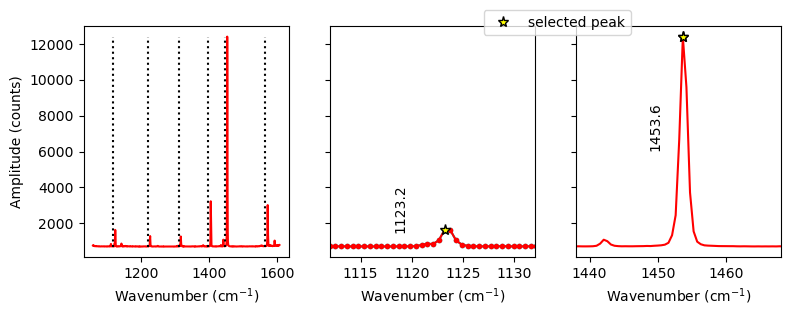

In [13]:
exclude_range_1=None
exclude_range_2=None
Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=spectra_path,
                filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=line_1, peak2_cent=line_2,
height=10, threshold=0.6, distance=1, prominence=10, width=1,
exclude_range_1=exclude_range_1, print_df=True)

### Lets estimate the amplitude and sigma, these are the most vital imputs to get the looping working

In [14]:
model_name='PseudoVoigtModel'
Ne_Config_est=pf.Ne_peak_config(model_name=model_name,
LH_offset_mini=[2, 5], 
lower_bck_pk1=(-40, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
N_poly_pk2_baseline=2 )

,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,NE25.txt,1453.737003,18494.641912,0.642737,None,0.00238,0.355358,1123.461667,1659.591476,0.637548,None,NaN,0.424747,330.275335,1.000613,NaN,NaN,35.441087,5.520336,40.961422


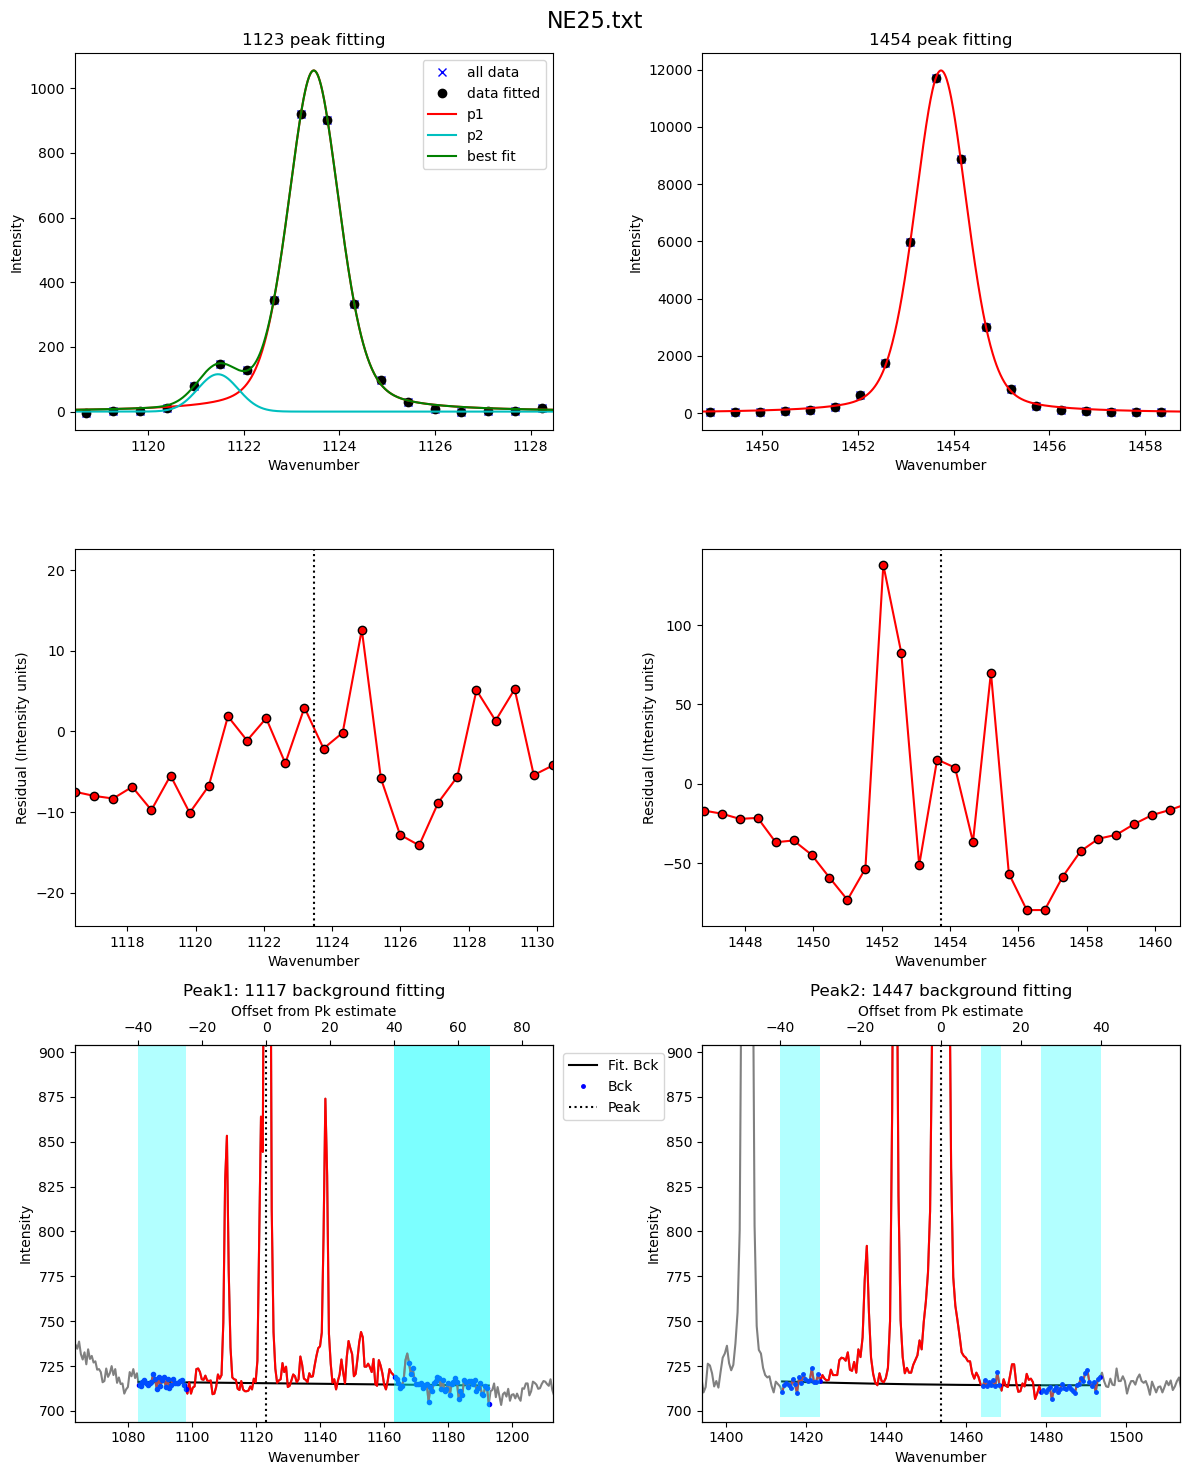

In [15]:
peaks_1=2

df_test_params=pf.fit_Ne_lines(  
    config=Ne_Config_est, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=spectra_path, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

In [16]:
Ne_Config=pf.Ne_peak_config(model_name=model_name,
pk1_amplitude=df_test_params['pk1_amplitude'][0],
pk2_amplitude=df_test_params['pk2_amplitude'][0],
pk1_sigma=df_test_params['pk1_sigma'][0], 
pk2_sigma=df_test_params['pk2_sigma'][0],
LH_offset_mini=[2, 5], 
lower_bck_pk1=(-40, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
            
N_poly_pk2_baseline=2 )

,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,NE25.txt,1453.737002,18494.598554,0.642738,None,0.00238,0.355349,1123.461669,1659.564866,0.637558,None,NaN,0.424685,330.275334,1.000613,NaN,NaN,35.44082,5.520012,40.960831


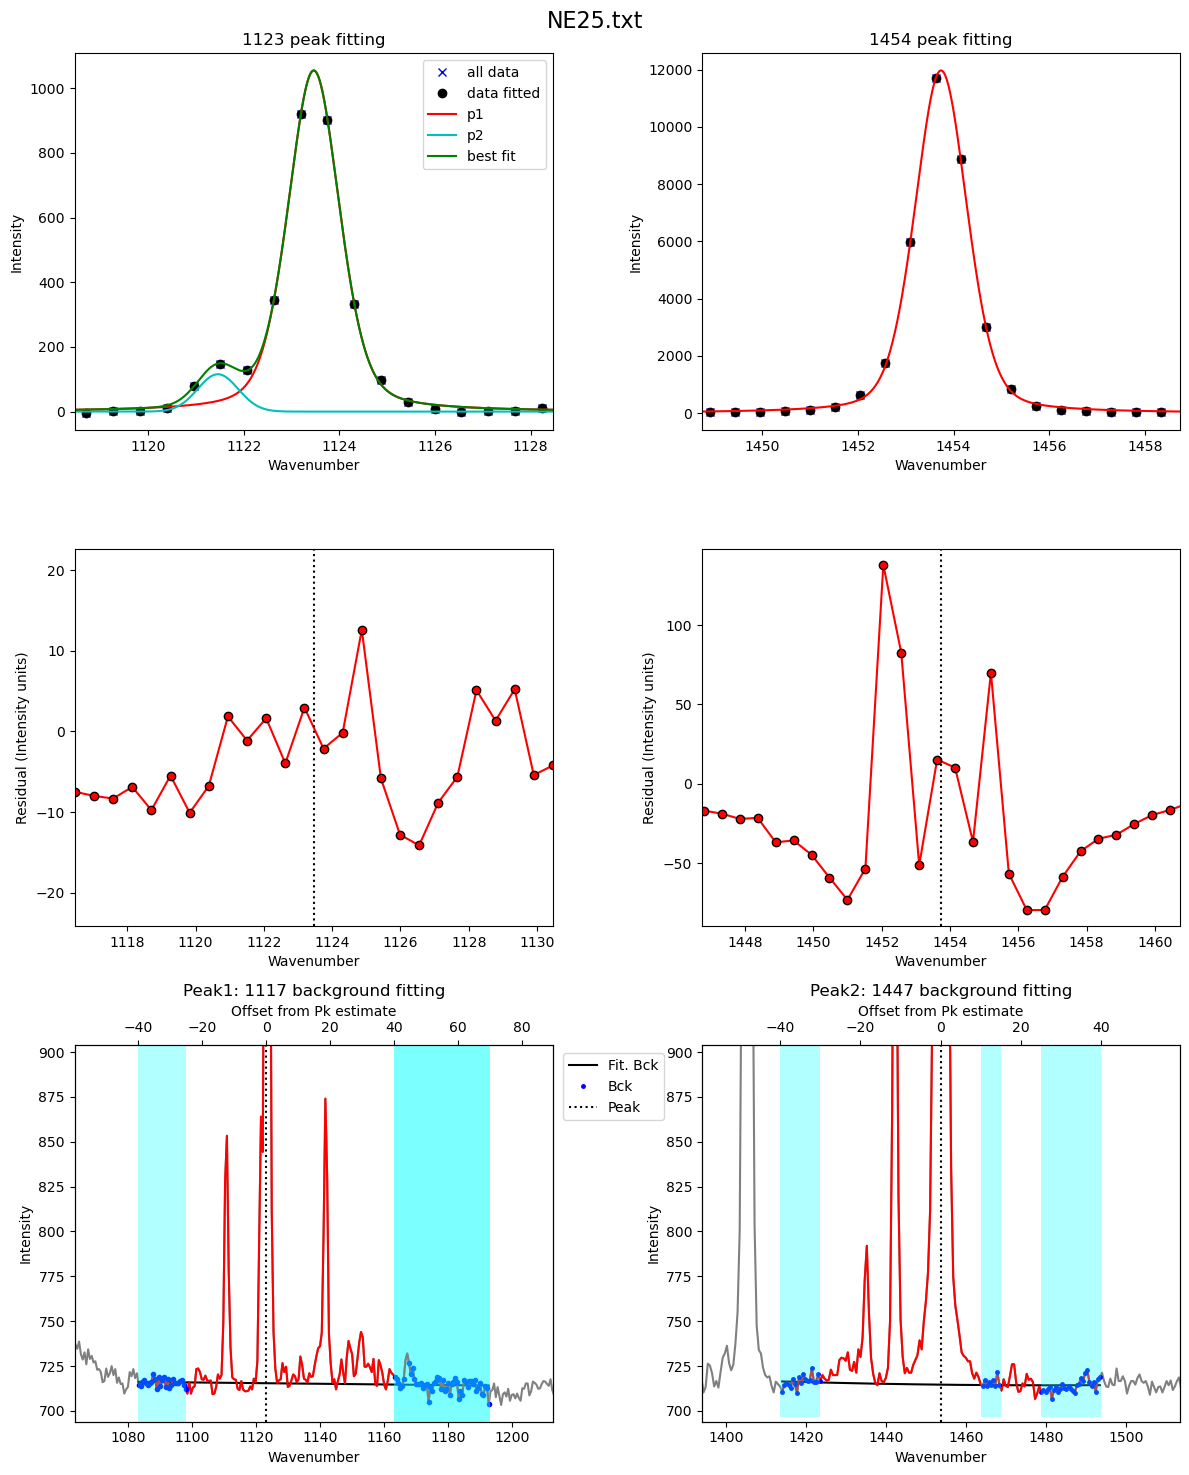

In [17]:
# You also need to set whether you want 1 peak or 2 for the LH diad


df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=spectra_path, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
display(df_test)

## Now fit all Ne files here using these parameters. 
- If you select plot_figure=False, the loop will be quick. 
- But if its True, you can to inspect the figures.

In [18]:

df2=pf.loop_Ne_lines(files=Ne_files, spectra_path=spectra_path, 
filetype=filetype,
config=Ne_Config, peaks_1=peaks_1,
peak1_cent=line_1, peak2_cent=line_2,
exclude_range_1=exclude_range_1,
exclude_range_2=exclude_range_2, DeltaNe_ideal=ideal_split['Ne_Split'], 
plot_figure=False, save_clipboard=True, print_df=False, single_acq=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:10<00:00,  7.17it/s]


In [19]:
df2.to_clipboard(excel=True)

## Stitch metadata with spectral fits
- This allows us to inspect changes in Ne correction factor with time.

### Find Metadatafiles

In [20]:
Ne_files_meta=pf.get_Ne_files(path=meta_path,
file_ext='txt', ID_str=ID_str, 
exclude_str=exclude_str, sort=True)

Ne_files_meta[0]

'NE22.txt'

In [21]:
Ne_files_meta

['NE22.txt',
 'NE23.txt',
 'NE24.txt',
 'NE25.txt',
 'NE26.txt',
 'NE27.txt',
 'NE28.txt',
 'NE29.txt',
 'NE30.txt',
 'NE31.txt',
 'NE32.txt',
 'NE33.txt',
 'NE34.txt',
 'NE35.txt',
 'NE36.txt',
 'NE37.txt',
 'NE38.txt',
 'NE39.txt',
 'NE40.txt',
 'NE41.txt',
 'NE42.txt',
 'NE43.txt',
 'NE44.txt',
 'NE45.txt',
 'NE46.txt',
 'NE47.txt',
 'NE48.txt',
 'NE49.txt',
 'NE50.txt',
 'NE51.txt',
 'NE52.txt',
 'NE53.txt',
 'NE54.txt',
 'NE55.txt',
 'NE56.txt',
 'NE57.txt',
 'NE58.txt',
 'NE59.txt',
 'NE60.txt',
 'NE61.txt',
 'NE62.txt',
 'NE63.txt',
 'NE64.txt',
 'NE65.txt',
 'NE66.txt',
 'NE67.txt',
 'NE68.txt',
 'NE69.txt',
 'NE70.txt',
 'NE71.txt',
 'NE72.txt',
 'NE73.txt',
 'NE74.txt',
 'NE75.txt',
 'NE76.txt',
 'NE77.txt',
 'Ne1.txt',
 'Ne10.txt',
 'Ne11.txt',
 'Ne12.txt',
 'Ne13.txt',
 'Ne14.txt',
 'Ne15.txt',
 'Ne16.txt',
 'Ne17.txt',
 'Ne18.txt',
 'Ne19.txt',
 'Ne2.txt',
 'Ne20.txt',
 'Ne21.txt',
 'Ne3.txt',
 'Ne4.txt',
 'Ne5.txt',
 'Ne6.txt',
 'Ne7.txt',
 'Ne8.txt',
 'Ne9.txt']

### Extract the metadata from these

In [22]:
meta=pf.stitch_metadata_in_loop(path=meta_path, 
Allfiles=Ne_files_meta, prefix=False)
meta.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 35.41it/s]

Done
Oof, try not to work after midnight!


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
46,NE68.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:07:01 AM\n,86821.0,1341.0
47,NE69.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:14:20 AM\n,87260.0,1341.0
48,NE70.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:21:12 AM\n,87672.0,1341.0
49,NE71.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:36:29 AM\n,88589.0,1341.0
50,NE72.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:44:10 AM\n,89050.0,1341.0


## Strip back file names so you can combine meta and spectra
 - You now need to get the metadata and spectra files in the same format so you can merge these 2 dataframes (e.g., the spectra fits, and the metadata information)
 - On Witec you have to strip off the prefix because the metadata and spectra #s dont match, as pictures also get an index

In [23]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][0])

NE22.txt


In [24]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=None,
   file_type='.txt')
file_m

array(['NE68', 'NE69', 'NE70', 'NE71', 'NE72', 'NE73', 'NE74', 'NE75',
       'NE76', 'NE77', 'Ne1', 'Ne2', 'Ne3', 'Ne4', 'Ne5', 'Ne6', 'Ne7',
       'Ne8', 'Ne9', 'Ne10', 'Ne11', 'Ne12', 'Ne13', 'Ne14', 'Ne15',
       'Ne16', 'Ne17', 'Ne18', 'Ne19', 'Ne20', 'Ne21', 'NE22', 'NE23',
       'NE24', 'NE25', 'NE26', 'NE27', 'NE28', 'NE29', 'NE30', 'NE31',
       'NE32', 'NE33', 'NE34', 'NE35', 'NE36', 'NE37', 'NE38', 'NE39',
       'NE40', 'NE41', 'NE42', 'NE43', 'NE44', 'NE45', 'NE46', 'NE47',
       'NE48', 'NE49', 'NE50', 'NE51', 'NE52', 'NE53', 'NE54', 'NE55',
       'NE56', 'NE57', 'NE58', 'NE59', 'NE60', 'NE61', 'NE62', 'NE63',
       'NE64', 'NE65', 'NE66', 'NE67'], dtype=object)

In [25]:
# Do the same for spectra, e.g., work out what you need to strip off
print(df2['filename'][0])

NE22.txt


In [26]:
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, str_prefix=' ',
   file_type='.txt')
file_s

array(['NE22', 'NE23', 'NE24', 'NE25', 'NE26', 'NE27', 'NE28', 'NE29',
       'NE30', 'NE31', 'NE32', 'NE33', 'NE34', 'NE35', 'NE36', 'NE37',
       'NE38', 'NE39', 'NE40', 'NE41', 'NE42', 'NE43', 'NE44', 'NE45',
       'NE46', 'NE47', 'NE48', 'NE49', 'NE50', 'NE51', 'NE52', 'NE53',
       'NE54', 'NE55', 'NE56', 'NE57', 'NE58', 'NE59', 'NE60', 'NE61',
       'NE62', 'NE63', 'NE64', 'NE65', 'NE66', 'NE67', 'NE68', 'NE69',
       'NE70', 'NE71', 'NE72', 'NE73', 'NE74', 'NE75', 'NE76', 'NE77',
       'Ne1', 'Ne10', 'Ne11', 'Ne12', 'Ne13', 'Ne14', 'Ne15', 'Ne16',
       'Ne17', 'Ne18', 'Ne19', 'Ne2', 'Ne20', 'Ne21', 'Ne3', 'Ne4', 'Ne5',
       'Ne6', 'Ne7', 'Ne8', 'Ne9'], dtype=object)

## Combine 2 dataframes
- Here we add a new column to each dataframe with these stripped back names, and then merge the 2 dataframes

In [27]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect changes in Ne correction factor with time
- Normally, you can spot outliers this way

In [29]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo_sort.to_excel('PseudoVoigt.xlsx')

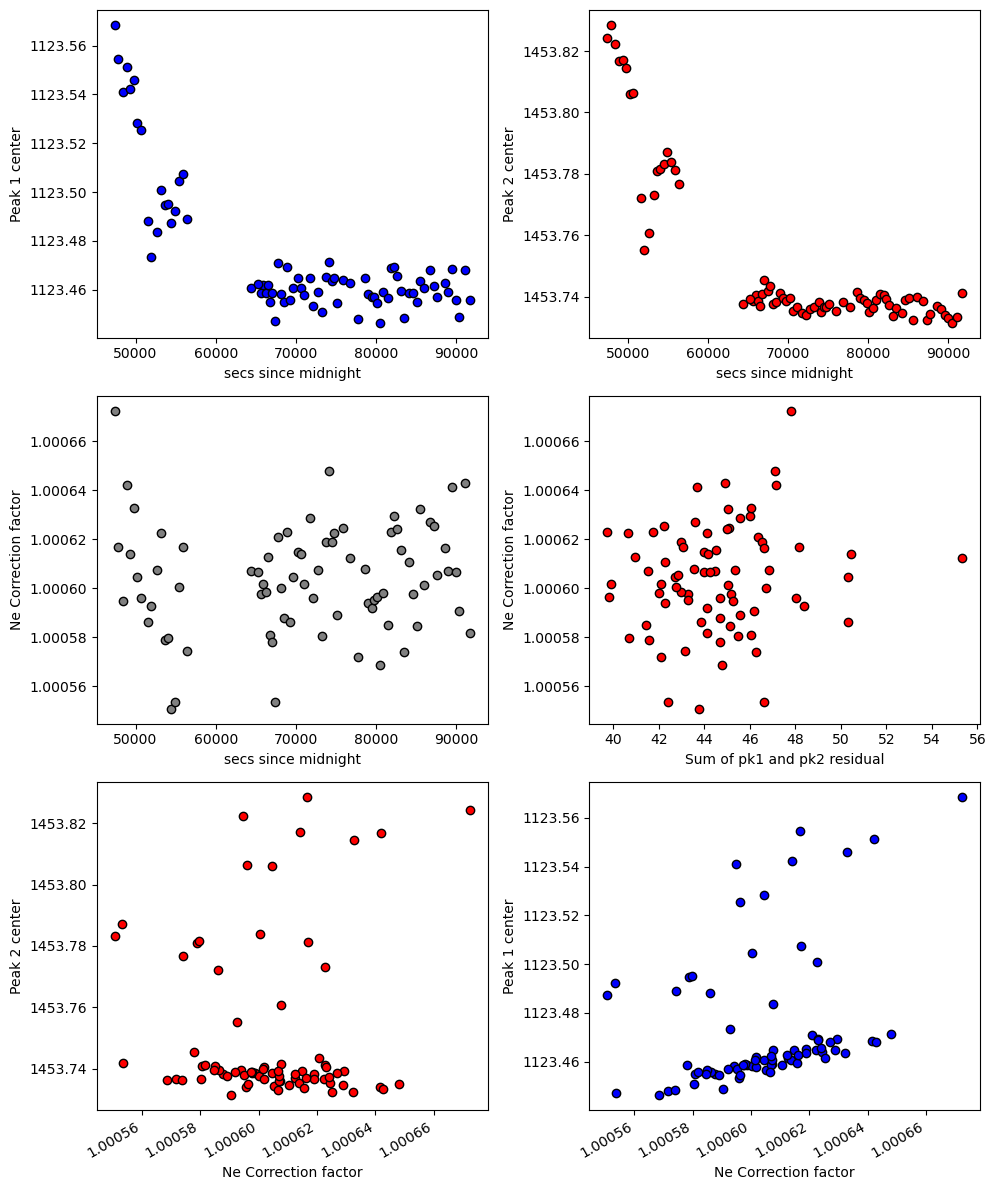

In [30]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')


In [30]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo

,filename_x,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,NE22.txt,1453.739423,19763.840782,0.336757,0.336757,0.00632,None,1123.456852,1729.472672,0.339856,...,November,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",6:14:14 PM\n,65654.0,1341.0
1,NE23.txt,1453.741293,19718.569508,0.337175,0.337175,0.00642,None,1123.460017,1724.650761,0.346301,...,November,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",6:18:46 PM\n,65926.0,1341.0
2,NE24.txt,1453.739456,19922.644721,0.337738,0.337738,0.00645,None,1123.457715,1732.306523,0.337911,...,November,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",6:23:51 PM\n,66231.0,1341.0
3,NE25.txt,1453.737813,19726.209133,0.338539,0.338539,0.00649,None,1123.460950,1734.771420,0.340131,...,November,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",6:28:13 PM\n,66493.0,1341.0
4,NE26.txt,1453.741527,20329.194293,0.335636,0.335636,0.00614,None,1123.453550,1760.278080,0.340420,...,November,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",6:32:37 PM\n,66757.0,1341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ne5.txt,1453.817680,21708.318914,0.327324,0.327324,0.00564,None,1123.540070,1539.360602,0.343076,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",1:42:09 PM\n,49329.0,1341.0
73,Ne6.txt,1453.815298,21839.934854,0.329250,0.329250,0.00567,None,1123.545089,1589.804636,0.330439,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",1:49:43 PM\n,49783.0,1341.0
74,Ne7.txt,1453.806668,21538.886773,0.328818,0.328818,0.00570,None,1123.527280,1556.996902,0.339547,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",1:56:46 PM\n,50206.0,1341.0
75,Ne8.txt,1453.806706,21290.082448,0.329137,0.329137,0.00583,None,1123.524743,1605.339965,0.337821,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:03:37 PM\n,50617.0,1341.0


In [31]:
df_combo_sort.to_clipboard(excel=True)

## Exclude ones that don't look right...
- The filter_Ne_Line_neighbours excludes Ne lines that have a correction factor more than "offset" from their N neighbours (defined by "number_av")
- Tweak offset and number_av until you exclude the ones that dont look right

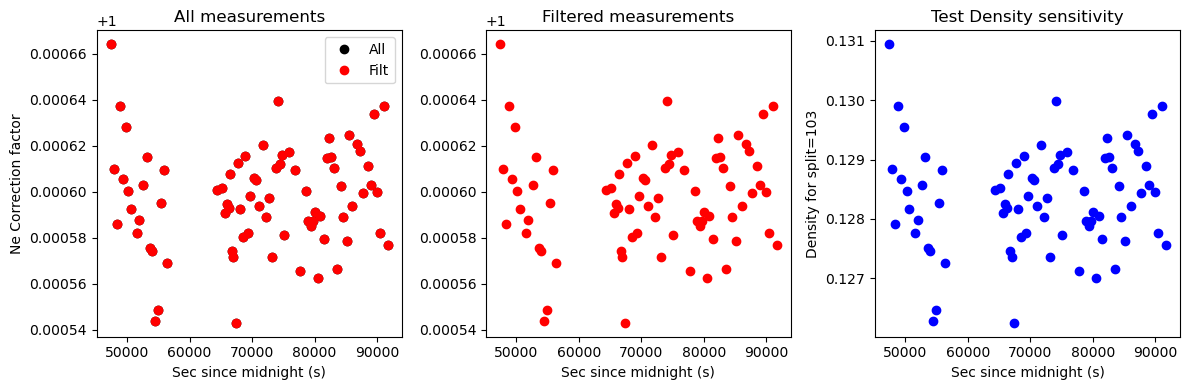

In [32]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], number_av=5, offset=0.0002)
# Now lets plot this to see
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')


ax1.set_xlabel('Sec since midnight (s)')
ax1.set_ylabel('Ne Correction factor')
ax1.set_title('All measurements')
ax2.set_xlabel('Sec since midnight (s)')
ax2.set_title('Filtered measurements')
ax3.set_xlabel('Sec since midnight (s)')
ax3.set_ylabel('Density for split=' + str(test_split))
ax3.set_title('Test Density sensitivity')
fig.tight_layout()

## Now lets make a regression against time
- We take this time regression and then apply to our diad fits

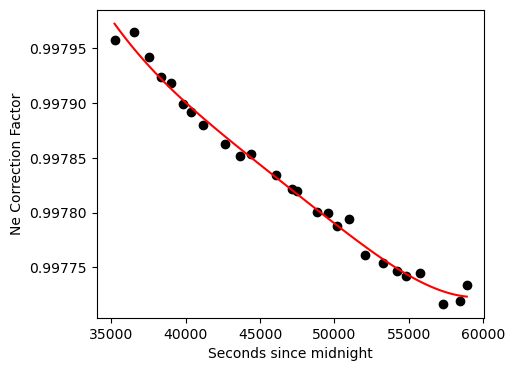

In [24]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=4, fit='poly')

In [1]:
(44000-36000)/11

727.2727272727273

## SAving as pickle, can then load as a pickle

In [25]:
import pickle
with open('Ne_Line_Regression_Example_ML1.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)

## Temperature data for this day

## You can then load these pickles into the notebook where you fit your Diad data|

In [26]:
## Comparison to CCMR
deltaNeCCMR=1.00065-1.00055
deltaNeCCMR

9.999999999998899e-05

In [27]:
deltaBerk=0.9981-0.9976

In [28]:
deltaBerk/deltaNeCCMR

5.0

## Temperature for the day

In [38]:
Temp=pd.read_excel('Temperature_Record_Aranet.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Temperature_Record_Aranet.xlsx'

In [ ]:
Temp.head()

In [57]:
TD=Temp['Time(dd/mm/yyyy)']
hour=np.empty(len(Temp), dtype=object)
date=np.empty(len(Temp), dtype=object)
time=np.empty(len(Temp), dtype=object)
minutes=np.empty(len(Temp), dtype=object)
seconds=np.empty(len(Temp), dtype=object)
secs_sm=np.empty(len(Temp), dtype=object)
for i in range(0, len(Temp)):
    date[i]=TD.iloc[i].split(' ')[0]
    time[i]=TD.iloc[i].split(' ')[1]
    hour[i]=time[i].split(':')[0]
    minutes[i]=time[i].split(':')[1]
    seconds[i]=time[i].split(':')[2]
    secs_sm[i]=float(hour[i])*60*60+float(minutes[i])*60+float(seconds[i])

Text(0, 0.5, 'Temperature (C)')

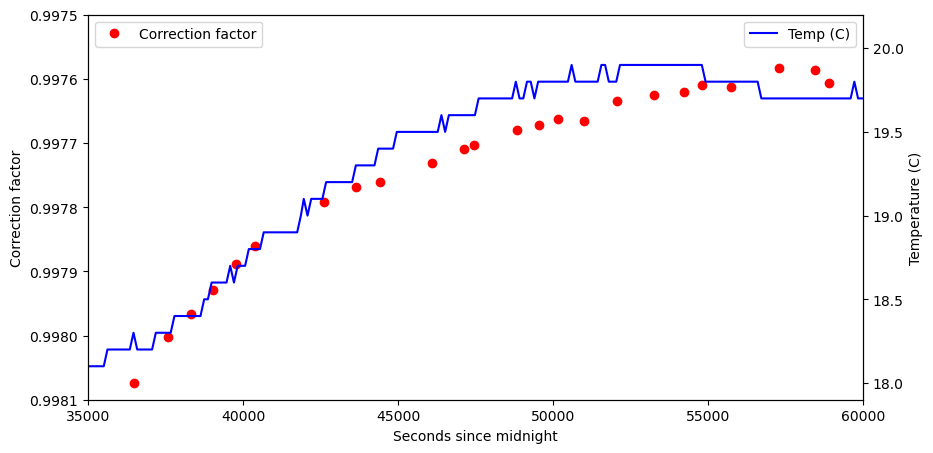

In [108]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
ax2=ax1.twinx()
ax2.plot(secs_sm, Temp['Temperature(Â°C)'], '-b', label='Temp (C)')

ax1.plot(df_combo['sec since midnight'], filt,  'or',
         label='Correction factor', zorder=100)
ax1.set_xlim([35000, 60000])
ax2.set_xlim([35000, 60000])
ax1.set_ylim([0.9981, 0.9975])
ax2.set_ylim([17.9, 20.2])
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Seconds since midnight')
ax1.set_ylabel('Correction factor')
ax2.set_ylabel('Temperature (C)')

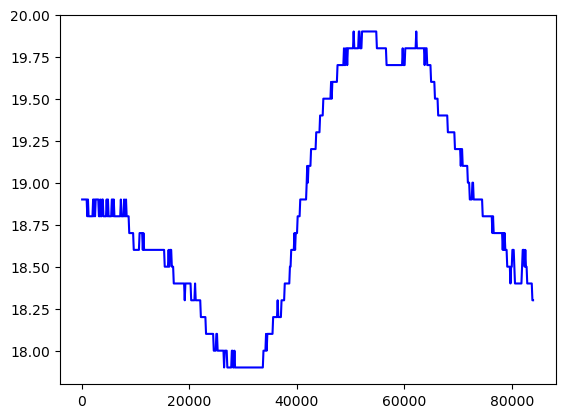

In [88]:
plt.plot(secs_sm, Temp['Temperature(Â°C)'], '-b', label='Temp (C)')

(30000.0, 35000.0)

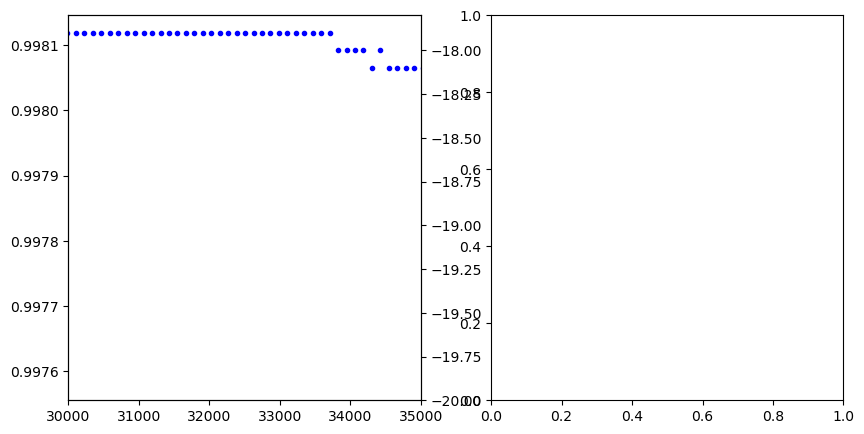

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_combo['sec since midnight'], filt,  'or',
         label='Correction factor')
ax2=ax1.twinx()
ax2.plot(secs_sm, -Temp['Temperature(Â°C)'], '.b', label='Temp (C)')
ax1.set_xlim([30000, 35000])
ax2.set_xlim([30000, 35000])

In [71]:
secs_sm

array([106.0, 226.0, 346.0, 466.0, 586.0, 706.0, 826.0, 946.0, 1066.0,
       1186.0, 1306.0, 1426.0, 1546.0, 1666.0, 1786.0, 1906.0, 2026.0,
       2146.0, 2266.0, 2386.0, 2506.0, 2626.0, 2746.0, 2866.0, 2986.0,
       3106.0, 3226.0, 3346.0, 3466.0, 3586.0, 3706.0, 3826.0, 3946.0,
       4066.0, 4186.0, 4306.0, 4426.0, 4546.0, 4666.0, 4786.0, 4906.0,
       5026.0, 5146.0, 5266.0, 5386.0, 5506.0, 5626.0, 5746.0, 5866.0,
       5986.0, 6106.0, 6226.0, 6346.0, 6466.0, 6586.0, 6706.0, 6826.0,
       6946.0, 7066.0, 7186.0, 7306.0, 7426.0, 7546.0, 7666.0, 7786.0,
       7906.0, 8026.0, 8146.0, 8266.0, 8386.0, 8506.0, 8626.0, 8746.0,
       8866.0, 8986.0, 9106.0, 9226.0, 9346.0, 9466.0, 9586.0, 9706.0,
       9826.0, 9946.0, 10066.0, 10186.0, 10306.0, 10426.0, 10546.0,
       10666.0, 10786.0, 10906.0, 11026.0, 11146.0, 11266.0, 11386.0,
       11506.0, 11626.0, 11746.0, 11866.0, 11986.0, 12106.0, 12226.0,
       12346.0, 12466.0, 12586.0, 12706.0, 12826.0, 12946.0, 13066.0,
       13186

In [50]:
time_100=time[300]
time_100.split(':')[0]

'10'

In [34]:
        if 'AM' in line2:
            line3=line2.strip(' AM\n')
            line3_hr=line3.split(':')[0]
            line3_min=re.search(':(.*):', line3).group(1)
            line3_sec=re.search(':(.*)', line2).group(1)[3:5]



        if line3_hr != '12' and 'PM' in line2:
            line3_sec_int=12*60*60+float(line3_hr)*60*60+float(line3_min)*60+float(line3_sec)
        else:
            line3_sec_int=float(line3_hr)*60*60+float(line3_min)*60+float(line3_sec)


NameError: name 'line2' is not defined

In [ ]:
Temp['Time(dd/mm/yyyy)']